* MNIST는 28 x 28 크기의 이미지. 1개 채널의 흑백이미지. 0~9의 숫자를 표현

In [1]:
import warnings
warnings.filterwarnings('ignore')

import torchvision
import torchvision.datasets as dsets

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import matplotlib.pyplot as plt
import random

torch.manual_seed(1)
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [2]:
mnist_train = dsets.MNIST(root="MNIST_data/", train=True, transform=torchvision.transforms.ToTensor(), 
                         download=True) # train=True : train set
mnist_test = dsets.MNIST(root="MNIST_data/", train=False, transform=torchvision.transforms.ToTensor(), 
                         download=True) # transform.ToTensor : 이미지를 pytorch에 최적화

## Softmax

In [3]:
linear = torch.nn.Linear(784, 10, bias=True).to(device) # 784 : 28*28, 10 : 0~9

training_epochs = 15
batch_size = 100

criterion = torch.nn.CrossEntropyLoss().to(device) # CrossEntropyLoss 는 Softmax를 자동으로 연산해줌
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

data_loader = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size, shuffle=True, drop_last=True)
# drop_last : batch_size만큼 불러오다 마지막에 batch_size보다 작은 수만큼 남으면 사용할지 여부. true : 버림

for epoch in range(training_epochs): # 15번 반복 학습
    avg_cost = 0
    total_batch = len(data_loader)
    
    for X, Y in data_loader:
        X = X.view(-1, 28 * 28).to(device) # reshape
        optimizer.zero_grad()
        
        hypothesis = linear(X) # prediction
        
        cost = criterion(hypothesis, Y) # CrossEntropy
        cost.backward() # Gradient 도출
        
        optimizer.step() # update
        avg_cost += cost / total_batch
    print("Epoch: ", "%04d" % (epoch+1), "cost =", "{:.9f}".format(avg_cost))

Epoch:  0001 cost = 0.533756435
Epoch:  0002 cost = 0.359071344
Epoch:  0003 cost = 0.330853909
Epoch:  0004 cost = 0.316269368
Epoch:  0005 cost = 0.306897253
Epoch:  0006 cost = 0.299754918
Epoch:  0007 cost = 0.295043945
Epoch:  0008 cost = 0.290703654
Epoch:  0009 cost = 0.287395447
Epoch:  0010 cost = 0.284370959
Epoch:  0011 cost = 0.281917304
Epoch:  0012 cost = 0.279720306
Epoch:  0013 cost = 0.277781814
Epoch:  0014 cost = 0.275830269
Epoch:  0015 cost = 0.274402380


## Test

In [4]:
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)
    
    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print("Accuracy: ", accuracy.item())

Accuracy:  0.8838000297546387


## Visualization

Label:  2
Prediction:  2


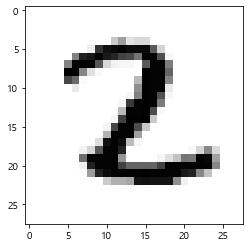

In [5]:
r = random.randint(0, len(mnist_test)- 1)
X_single_data = mnist_test.test_data[r:r+1].view(-1, 28*28).float().to(device)
Y_single_data = mnist_test.test_labels[r:r+1].to(device)

print("Label: ", Y_single_data.item())

single_prediction = linear(X_single_data)
print("Prediction: ", torch.argmax(single_prediction, 1).item())

plt.imshow(mnist_test.test_data[r:r+1].view(28, 28), cmap="Greys", interpolation="nearest")
plt.show()